In [68]:
import os
import pprint
import asyncio
import aiohttp
import time
from dotenv import load_dotenv
from googlesearch import search
from fake_useragent import UserAgent
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

### 資訊爬取

In [69]:
def fetch_page(url):
     # Create a random user agent
    user_agent = UserAgent().random

    # Set the headers for the request
    headers = {'User-Agent': user_agent}

    session = requests.Session()
    session.headers.update({'User-Agent': user_agent})
    response = session.get(url)
    return response

def process_url(url, parser):
    try:
        response = fetch_page(url)
        if response.status_code == 200:
            result = parser(response.text, url)
            return result
        else:
            print(f"Failed to fetch {url}: Status code {response.status_code}")

    except Exception as e:
        print(f"Error fetching {url}: {e}")
        

def parse_page_for_tv(html_content, url):
    try:
        soup = BeautifulSoup(html_content, 'html.parser')
        text_content_list = soup.find_all('p')
        # print(text_content_list)
        soup = BeautifulSoup(str(text_content_list), 'html.parser')
        text = soup.getText()
        text = clean_text(text)
        return text
    
    except Exception as e:
        print(f"Error parsing {url}: {e}")


def clean_text(text):
    text = text.split('\n')

    # remove unwanted string
    text = [x.strip() for x in text]
    text = [x for x in text if x != '']
    text = [x for x in text if x != ' ']
    text = [x for x in text if x != "\n"]
    text = [x for x in text if x != ", "]
    text = [x for x in text if x != ","]
    text = [x for x in text if x != "'"]

    merged_text = '\n'.join(text)
    merged_text = merged_text.replace('\t', '')
    merged_text = merged_text.replace(', ', '')

    return merged_text


def write_to_file(text, file_name):
    if text is None:
        return
    
    with open(file_name, 'w') as f:
        f.write(text)

### Selenium

In [77]:
def get_page_with_selenium(url):
    # Create a random user agent
    user_agent = UserAgent().random

    # Setup Selenium with ChromeDriver
    service = Service(ChromeDriverManager().install())
    options = webdriver.ChromeOptions()

    # Set the user agent
    options.add_argument(f'user-agent={user_agent}')

    # Optional: Use headless mode (no GUI window)
    options.add_argument('--headless')

    # Initialize the WebDriver
    driver = webdriver.Chrome(service=service, options=options)

    # Navigate to the URL
    driver.get(url)

    # Optional: Wait for some condition or time if necessary
    # driver.implicitly_wait(10) # wait for 10 seconds

    # make selenium perform a smooth scroll action, only scroll 100vh at a time
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")

    # Access the page source or interact with the page
    page_source = driver.page_source

    # wait 30 seconds
    # time.sleep(30)

    # Close the WebDriver
    driver.quit()

    return page_source

In [50]:
response = fetch_page("https://www.amazon.com/Samsung-Electronics-UN32N5300AFXZA-1080p-Smart/product-reviews/B07CL4GLQW/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=1")

In [51]:
print(response.text)

<!DOCTYPE html>
<!--[if lt IE 7]> <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8 a-lt-ie7"> <![endif]-->
<!--[if IE 7]>    <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8"> <![endif]-->
<!--[if IE 8]>    <html lang="en-us" class="a-no-js a-lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="a-no-js" lang="en-us"><!--<![endif]--><head>
<meta http-equiv="content-type" content="text/html; charset=UTF-8">
<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
<title dir="ltr">Amazon.com</title>
<meta name="viewport" content="width=device-width">
<link rel="stylesheet" href="https://images-na.ssl-images-amazon.com/images/G/01/AUIClients/AmazonUI-3c913031596ca78a3768f4e934b1cc02ce238101.secure.min._V1_.css">
<script>

if (true === true) {
    var ue_t0 = (+ new Date()),
        ue_csm = window,
        ue = { t0: ue_t0, d: function() { return (+new Date() - ue_t0); } },
        ue_furl = "fls-na.amazon.com",
        ue_mid = "ATVPDKIKX0DER",
    

In [20]:
# using bs4 to parse the content
soup = BeautifulSoup(response.text, 'html.parser')

# find h1 tag with id "title"
title = soup.find(id="title")

### Selenium

<html lang="en-us" class=" a-js a-audio a-video a-canvas a-svg a-drag-drop a-geolocation a-history a-webworker a-autofocus a-input-placeholder a-textarea-placeholder a-local-storage a-gradients a-hires a-transform3d -scrolling a-text-shadow a-text-stroke a-box-shadow a-border-radius a-border-image a-opacity a-transform a-transition null" data-19ax5a9jf="dingo" data-aui-build-date="3.23.4-2023-12-21"><!-- sp:feature:head-start --><head><script async="" src="https://images-na.ssl-images-amazon.com/images/I/31bJewCvY-L.js" crossorigin="anonymous"></script><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8">
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->

<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta http-equiv="x-dns-prefetch-control" content="on">
<link rel="dns-prefetch" href="https://images-na.ssl-images-amazon.com" crossor
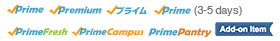

In [78]:
url = "https://www.amazon.com/Samsung-Electronics-UN32N5300AFXZA-1080p-Smart/dp/B07CL4GLQW?ref_=Oct_d_oup_d_6459737011_1&pd_rd_w=OHaG0&content-id=amzn1.sym.be90cfaf-ddce-4e28-b561-f2a8c0017fef&pf_rd_p=be90cfaf-ddce-4e28-b561-f2a8c0017fef&pf_rd_r=86KP4DA4QG41GJVH64YW&pd_rd_wg=tJ3kg&pd_rd_r=b25f0980-ad34-42ec-b782-0130263b0153&pd_rd_i=B07CL4GLQW&th=1"

page_content = get_page_with_selenium(url)
print(page_content)

In [94]:
# using bs4 to parse the content
soup = BeautifulSoup(page_content, 'html.parser')

# find element with id "centerCol"
text_content_element = soup.find(id="centerCol")

# find element with id "title" from text_content_element
title = text_content_element.find(id="title")

# find element with id "poExpander" from text_content_element
product_specs_elements = text_content_element.find(id="poExpander")

# find all elements with tag "tr" from product_specs_elements
product_specs_elements = product_specs_elements.find_all("tr")

# extract the title and value from each element
product_specs_elements = [(x.find("th").getText(), x.find("td").getText()) for x in product_specs_elements]

# find element with id "featurebullets_feature_div" from text_content_element
product_features_elements = text_content_element.find(id="featurebullets_feature_div")

print("Title: ", title.getText())
print("Product Specs: ", product_specs_elements)
print("Product Features: ", product_features_elements)


# # extract text from the element
# text = text_content_element.getText()

# # clean the text
# text = clean_text(text)

# print(text)

<class 'bs4.element.Tag'>


AttributeError: 'NoneType' object has no attribute 'getText'